# MMDetection 3.0 설치

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


Mon Jul  3 01:47:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# install
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0,<2.1.0"

# gitclone
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

# version
import mmdet
print(mmdet.__version__)
# Example output: 3.0.0, or an another version.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.0 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 30.1 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 22.0 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 36698, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 36698 (delta 51), reused 142 (delta 44), pack-reused 36536
Receiving objects: 100% (36698/36698), 56.91 MiB | 21.12 MiB/s, done.
Resolving deltas: 100% (25742/25742), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Prepa

In [ ]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 2.0.1+cu118 cuda: True
mmdetection: 3.1.0
mmcv: 2.0.1
mmengine: 0.7.4


In [ ]:
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest .

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 92.4 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content/mmdetection
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content/mmdetection


In [ ]:
# case a
%run demo/image_demo.py demo/demo.jpg rtmdet_tiny_8xb32-300e_coco.py --weights rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth --device cpu

Loads checkpoint by local backend from path: rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

07/03 01:48:45 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
07/03 01:48:45 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


Output()

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming 
release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

results have been saved at outputs


In [ ]:
# case b
from mmdet.apis import init_detector, inference_detector

config_file = 'rtmdet_tiny_8xb32-300e_coco.py'
checkpoint_file = 'rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
inference_detector(model, 'demo/demo.jpg')

Loads checkpoint by local backend from path: rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



<DetDataSample(

    META INFORMATION
    img_id: 0
    ori_shape: (427, 640)
    img_shape: (640, 640)
    batch_input_shape: (640, 640)
    pad_shape: (640, 640)
    scale_factor: (1.0, 1.0)
    img_path: 'demo/demo.jpg'

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([], dtype=torch.int64)
            bboxes: tensor([], size=(0, 4))
        ) at 0x7f0b275d7190>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([], dtype=torch.int64)
            bboxes: tensor([], size=(0, 4))
        ) at 0x7f0b275d7070>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([13,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 56, 13,  2,  2,  2,
                         2,  2,  2,  2,  2,  2,  2,  7,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,

# 데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# permmision warning 방지
!chmod 600 ~/.kaggle/kaggle.json

# download the data
!kaggle datasets download -d jomainho/snack-data-to50 -p /content/

Saving kaggle.json to kaggle.json
100% 413M/415M [00:10<00:00, 46.2MB/s]
100% 415M/415M [00:10<00:00, 41.5MB/s]


In [ ]:
!unzip -q /content/snack-data-to50.zip -d /content/snack-data-to50

In [ ]:
import json

file_path = '/content/snack-data-to50/train/train.json'

with open(file_path, 'r') as file:
    data = json.load(file)

names = []  # List to store the values related to the 'name' key

# Iterate over the 'annotations' section of the data
for category in data['categories']:
    if 'name' in category:
        name = category['name']
        names.append(name)

# Print the extracted names
print(len(names))
print(names)

50
['65621', '50098', '30152', '45219', '30064', '30166', '50117', '50062', '30120', '20211', '10178', '45221', '10092', '30061', '10091', '30119', '25679', '30086', '50063', '15033', '45222', '65629', '65858', '30066', '50061', '20164', '10094', '90078', '30140', '15046', '45227', '30060', '15175', '10093', '65723', '90072', '10210', '30292', '10209', '45220', '35044', '30099', '30096', '65727', '65719', '65890', '90073', '10095', '20167', '30291']


# 데이터 확인

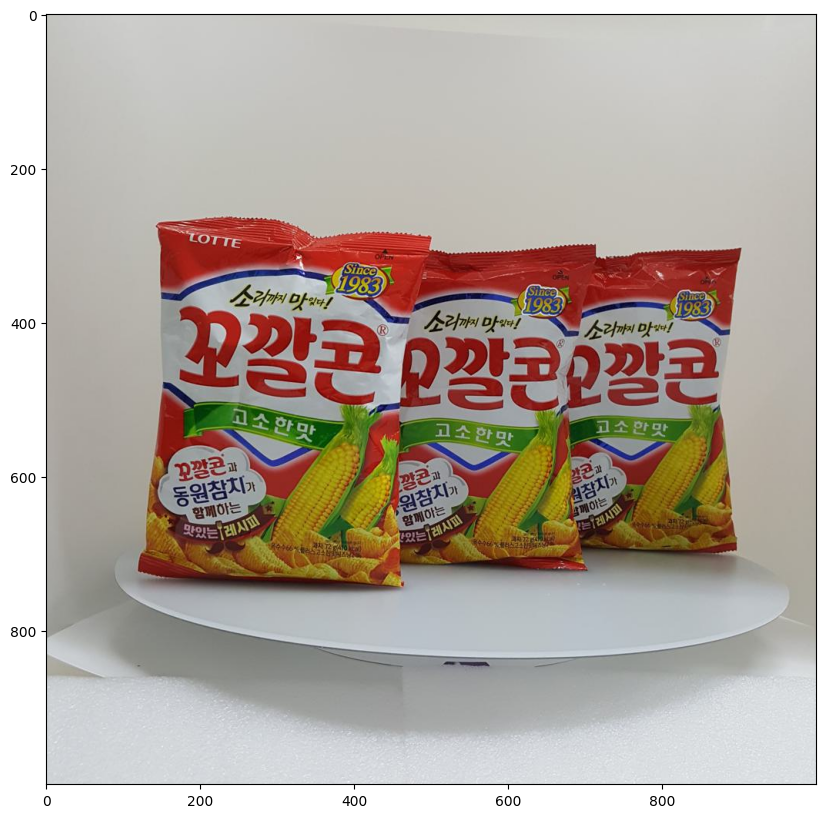

In [ ]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/snack-data-to50/train/images/10091_0_m_1.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

# 모델 학습

- Configuration 모델 준비

In [ ]:
from mmengine.config import Config
cfg = Config.fromfile('/content/mmdetection/projects/EfficientDet/configs/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'CocoDataset'
data_root = 'data/coco/'
backend_args = None
train_pipeline = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='RandomResize',
        scale=(896, 896),
        ratio_range=(0.1, 2.0),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(896, 896)),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackDetInputs')
]
test_pipeline = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='Resize', scale=(896, 896), keep_ratio=True),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='PackDetInputs',
        meta_keys=('img_id', 'img_path', 'ori_shape', 'img_shape',
                   'scale_factor'))
]
train_dataloader = dict(
    batch_size=16,
    num_workers=8,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=True, _scope_='mmdet'),
    batch_sampler=dict(type='AspectRatioBatchSampler', _

- Pretrained model 다운로드

In [ ]:
# -c url에서 다운받아 -0 경로에 저장한다.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v3.0/efficientdet/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco_20230223_122457-e6f7a833.pth \
      -O checkpoints/efficientdet_training.pth


mkdir: cannot create directory ‘checkpoints’: File exists
--2023-07-03 01:53:36--  https://download.openmmlab.com/mmdetection/v3.0/efficientdet/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco_20230223_122457-e6f7a833.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.206, 47.246.48.204, 47.246.48.207, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.206|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



- configuration 수정

In [ ]:
from mmengine.runner import set_random_seed

# Modify dataset classes and color
cfg.metainfo = {
  'classes': ('65621', '50098', '30152', '45219', '30064',
              '30166', '50117', '50062', '30120', '20211',
              '10178', '45221', '10092', '30061', '10091',
              '30119', '25679', '30086', '50063', '15033',
              '45222', '65629', '65858', '30066', '50061',
              '20164', '10094', '90078', '30140', '15046',
              '45227', '30060', '15175', '10093', '65723',
              '90072', '10210', '30292', '10209', '45220',
              '35044', '30099', '30096', '65727', '65719',
              '65890', '90073', '10095', '20167', '30291'),
    'palette': [(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60)]
}

cfg.train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=30, val_interval=4)
cfg.train_dataloader.batch_size = 1


# Modify dataset type and path
cfg.data_root = '/content/snack-data-to50'

cfg.train_dataloader.dataset.ann_file = 'train/train.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix.img = 'train/images'
cfg.train_dataloader.dataset.metainfo = cfg.metainfo



cfg.val_dataloader.dataset.ann_file = 'valid/valid.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix.img = 'valid/images'
cfg.val_dataloader.dataset.metainfo = cfg.metainfo

#cfg.test_dataloader = cfg.val_dataloader

#cfg.test_dataloader.dataset.ann_file = 'test.json'
#cfg.test_dataloader.dataset.data_root = cfg.data_root
#cfg.test_dataloader.dataset.data_prefix.img = 'images/'
#cfg.test_dataloader.dataset.metainfo = cfg.metainfo

#cfg.test_dataloader.dataset.pipeline = cfg.val_dataloader.dataset.pipeline
'''
# Modify pipelines
cfg.train_dataloader.dataset.pipeline=[
            dict(type='LoadImageFromFile', backend_args=None),
            dict(type='LoadAnnotations', with_bbox=True),
            dict(
                type='RandomResize',
                scale=(896, 896),
                ratio_range=(0.1, 2.0),
                keep_ratio=True),
            dict(type="RandomGrayscale"),
            dict(type='RandomCrop', crop_size=(896, 896)),
            dict(type='RandomFlip', prob=0.5),
            dict(type='PackDetInputs')
        ]
'''
# Modify metric config
cfg.val_evaluator.ann_file = cfg.data_root+'/'+'valid/valid.json'
#cfg.test_evaluator = cfg.val_evaluator
#cfg.test_evaluator.ann_file = cfg.data_root+'/'+'test.json'

# Modify num classes of the model in box head and mask head
cfg.model.bbox_head.num_classes = 50
# cfg.model.roi_head.mask_head.num_classes = 1

# We can still the pre-trained Mask RCNN model to obtain a higher performance
cfg.load_from = 'checkpoints/efficientdet_training.pth'


# Set up working dir to save files and logs.
cfg.work_dir = '/content/drive/MyDrive'


# We can set the evaluation interval to reduce the evaluation times
cfg.train_cfg.val_interval = 3
# We can set the checkpoint saving interval to reduce the storage cost
cfg.default_hooks.checkpoint.interval = 3

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optim_wrapper.optimizer.lr = 0.02 / 8
cfg.default_hooks.logger.interval = 10

# Set seed thus the results are more reproducible
# cfg.seed = 0
set_random_seed(0, deterministic=False)

# We can also use tensorboard to log the training process
cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})

print(f'Config:\n{cfg.pretty_text}')

RuntimeError: ignored

In [ ]:
import os

save_path = '/content/test.py'
try :
    os.mkdir(os.path.dirname(save_path))
except FileExistsError:
    print(f"Directory already exists: {os.path.dirname(save_path)}")

cfg.dump(save_path)

Directory already exists: /content


- 데이터 로드 및 학습 시작

In [ ]:
from mmengine.config import Config
from mmengine.runner import Runner
runner = Runner.from_cfg(cfg)

07/03 01:51:49 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 209652396
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


07/03 01:51:55 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
07/03 01:51:55 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
after_load_checkpoint:
(49          ) EMAHook                            
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_tr

In [ ]:
runner.train()

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
07/03 01:52:00 - mmengine - INFO - paramwise_options -- backbone.layers.0.bn.weight:weight_decay=0.0
07/03 01:52:00 - mmengine - INFO - paramwise_options -- backbone.layers.0.bn.bias:weight_decay=0.0
07/03 01:52:00 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.depthwise_conv.bn.weight:weight_decay=0.0
07/03 01:52:00 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.depthwise_conv.bn.bias:weight_decay=0.0
07/03 01:52:00 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.se.conv1.conv.bias:weight_decay=0.0
07/03 01:52:00 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.se.conv2.conv.bias:weight_decay=0.0
07/03 01:52:00 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.linear_conv.bn.weight:weight_decay=0.0
07/03 01:52:00 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.linear_conv.bn.bias:weight_decay=0.0
07/03 01:52:00 - mmengine - INF

Downloading: "https://download.openmmlab.com/mmclassification/v0/efficientnet/efficientnet-b3_3rdparty_8xb32-aa-advprop_in1k_20220119-53b41118.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b3_3rdparty_8xb32-aa-advprop_in1k_20220119-53b41118.pth


07/03 01:52:04 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: layers.6.bn.running_var, layers.6.bn.running_mean, layers.6.bn.weight, layers.6.bn.bias, layers.6.conv.weight

Loads checkpoint by local backend from path: checkpoints/efficientdet_training.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.cls_header.pointwise_conv.weight: copying a param with shape torch.Size([720, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([450, 160, 1, 1]).
size mismatch for bbox_head.cls_header.pointwise_conv.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([450]).
The model and loaded state dict do not match exactly

size mismatch for bbox_head.cls_header.pointwise_conv.weight: copying a param with shape torch.Size([720, 160, 1, 1]) from checkpoint, the shape in current model is torch.Size([450, 160, 1, 1]).
size mis

RuntimeError: ignored

# 훈련 결과 확인

In [ ]:
import mmcv
from mmdet.apis import init_detector, inference_detector
img = mmcv.imread('/content/snack-data-to50/valid/images/10210_30_m_2.jpg',channel_order='rgb')
checkpoint_file = '/content/drive/MyDrive/epoch_20.pth'
model = init_detector(cfg, checkpoint_file, device='cpu')  # or device='cuda:0'
new_result = inference_detector(model, img)
print(new_result)

In [ ]:
from mmdet.registry import VISUALIZERS
# init visualizer(run the block only once in jupyter notebook)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

In [ ]:
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=new_result,
    draw_gt = None,
    wait_time=0,
    pred_score_thr=0.8
)
visualizer.show()

In [ ]:
from mmengine.visualization import Visualizer

# get built visualizer
visualizer_now = Visualizer.get_current_instance()
#visualizer_now = Visualizer.get_instance()
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer_now.dataset_meta = model.dataset_meta
# show the results
visualizer_now.add_datasample(
    'new_result',
    img,
    data_sample=new_result,
    draw_gt= False,
    wait_time=0,
    out_file=None,
    step = 10,
    pred_score_thr=0.5
)
visualizer_now.show()